In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
TF = 'GRHL2'
MBC_sample = 'MBC_315.ctDNA_deepWGS'
MBC_data_GC_corrected = pd.read_csv('../../MBC/deepWGS_TFBS_nucleosome_profiling_10000_sites/results/'+MBC_sample+'/'+MBC_sample+'.GC_corrected.coverage.tsv', sep='\t')
MBC_data_uncorrected = pd.read_csv('../../MBC/deepWGS_TFBS_nucleosome_profiling_10000_sites/results/'+MBC_sample+'/'+MBC_sample+'.uncorrected.coverage.tsv', sep='\t')

HD_sample = 'HD46.ctDNA.WGS.FC19269448'
HD_data_GC_corrected = pd.read_csv('../../MBC/deepWGS_TFBS_nucleosome_profiling_10000_sites/results/'+HD_sample+'/'+HD_sample+'.GC_corrected.coverage.tsv', sep='\t')
HD_data_uncorrected = pd.read_csv('../../MBC/deepWGS_TFBS_nucleosome_profiling_10000_sites/results/'+HD_sample+'/'+HD_sample+'.uncorrected.coverage.tsv', sep='\t')


In [3]:
HD_GC_bias = pd.read_csv('../../GC_correction/deepWGS_GC_and_mappability_correction/results/GC_bias/'+HD_sample+'.GC_bias.txt', sep='\t')
HD_GC_bias = HD_GC_bias[(HD_GC_bias['smoothed_GC_bias']>0)]

MBC_GC_bias = pd.read_csv('../../GC_correction/deepWGS_GC_and_mappability_correction/results/GC_bias/'+MBC_sample+'.GC_bias.txt', sep='\t')
MBC_GC_bias = MBC_GC_bias[(MBC_GC_bias['smoothed_GC_bias']>0)]


In [4]:
GC_content = pd.read_csv('../../GC_and_mappability_content/GC_and_mappability_snakemake/results/'+TF+'.hg38.10000.smoothed_GC_content.tsv', sep='\t')

In [5]:
plot_columns = np.arange(-990,990,15)
str_plot_columns = [str(m) for m in plot_columns]

columns2 = np.arange(-990,990)
str_columns2 = [str(m) for m in columns2]


In [6]:
R = np.linspace(.122,1,7)
G = np.linspace(.467,1,7)
B = np.linspace(.706,1,7)

R2 = np.linspace(1, 1, 7)
G2 = np.linspace(.498,1,7)
B2 = np.linspace(.055,1,7)

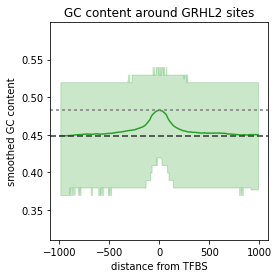

In [7]:
fig,axes = plt.subplots(1,1,figsize = (4.5,4))

ax = axes
ax.plot(columns2,np.nanmean(GC_content[str_columns2], axis = 0), label = 'smoothed GC content', color = 'tab:green') 
ax.fill_between(columns2, np.nanpercentile(GC_content[str_columns2],25, axis = 0), np.nanpercentile(GC_content[str_columns2],75, axis = 0), alpha = 0.25, color = 'tab:green', label = 'GC content +/- IQR')
ax.set_xlabel('distance from TFBS')
ax.set_ylabel('smoothed GC content')
#ax.legend(loc='upper left', bbox_to_anchor = [0,-.2])
ax.set_title('GC content around GRHL2 sites')
ax.margins(y=.35)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

#add line at max value
max_val = np.nanmean(GC_content[str_columns2], axis = 0).max()
ax.axhline(max_val, dashes = [2,2], color = 'tab:grey')

#add a line at min value
# flanking_columns = np.append(np.arange(-1000,30).astype('str'),np.arange(30,1000).astype('str'))
min_val = np.nanmean(GC_content[str_columns2], axis = 0).min()
ax.axhline(min_val, dashes = [4,2], color = '0.2')

fig.savefig('plots/GC_bias_demo_A.pdf')

In [10]:
min_val

0.4487274434129551

In [11]:
max_val

0.4826828761429759

MBC center bias: [2.11433769]
MBC flanking bias: [1.99023245]
HD center bias: [1.95695158]
HD flanking bias: [1.89932493]


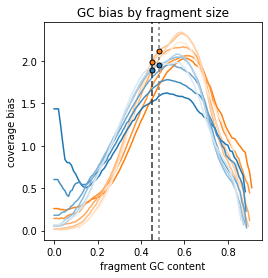

In [16]:
fig,axes = plt.subplots(1,1,figsize = (4.5,4))

ax = axes

markersize = 25
for i,length in enumerate([100,120,140,160,180,200]):
    current = MBC_GC_bias[(MBC_GC_bias['length']==length) & (MBC_GC_bias['smoothed_GC_bias']>0)]
    ax.plot(current['GC_content'],current['smoothed_GC_bias'], label = str(length)+' bp', color = [R2[i],G2[i],B2[i]])
    ax.set_xlabel('fragment GC content')
    ax.set_ylabel('coverage bias')
    ax.set_title('GC bias by fragment size')

for i,length in enumerate([100,120,140,160,180,200]):
    current = HD_GC_bias[(HD_GC_bias['length']==length) & (HD_GC_bias['smoothed_GC_bias']>0)]
    ax.plot(current['GC_content'],current['smoothed_GC_bias'], label = str(length)+' bp', color = [R[i],G[i],B[i]])
    ax.set_xlabel('fragment GC content')
    ax.set_ylabel('coverage bias')
    ax.set_title('GC bias by fragment size')

#add scatter point where dashed line intersects
for i,length in enumerate([160]):
    current = MBC_GC_bias[(MBC_GC_bias['length']==length) & (MBC_GC_bias['smoothed_GC_bias']>0)]
    max_val_int = int(np.round(max_val*160))
    max_val_y = current[current['num_GC']==max_val_int]['smoothed_GC_bias']
    ax.scatter(max_val,max_val_y, color = 'tab:orange', edgecolors = 'black',zorder = 10, s = markersize)
    print('MBC center bias:',max_val_y.values)
    min_val_int = int(np.round(min_val*160))
    min_val_y = current[current['num_GC']==min_val_int]['smoothed_GC_bias']
    ax.scatter(min_val,min_val_y, color = 'tab:orange', edgecolors = 'black',zorder = 10, s = markersize)
    print('MBC flanking bias:',min_val_y.values)
    
#add scatter point where dashed line intersects
for i,length in enumerate([160]):
    current = HD_GC_bias[(HD_GC_bias['length']==length) & (HD_GC_bias['smoothed_GC_bias']>0)]
    max_val_int = int(np.round(max_val*160))
    max_val_y = current[current['num_GC']==max_val_int]['smoothed_GC_bias']
    ax.scatter(max_val,max_val_y, color = 'tab:blue', edgecolors = 'black',zorder = 10, s = markersize)
    print('HD center bias:',max_val_y.values)

    min_val_int = int(np.round(min_val*160))
    min_val_y = current[current['num_GC']==min_val_int]['smoothed_GC_bias']
    ax.scatter(min_val,min_val_y, color = 'tab:blue', edgecolors = 'black',zorder = 10, s = markersize)
    print('HD flanking bias:',min_val_y.values)
    
    
#add line at max gc value from previous plot
ax.axvline(max_val, dashes = [2,2], color = 'tab:grey')
ax.axvline(min_val, dashes = [4,2], color = '0.2')

#ax.legend(loc='upper left', bbox_to_anchor = [0,-.2], ncol = 3)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    
fig.savefig('plots/GC_bias_demo_B.pdf')

[0.9  0.95 1.   1.05 1.1 ]


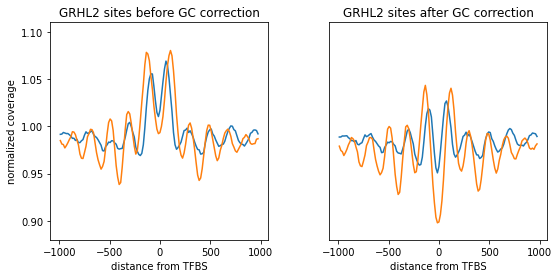

In [9]:
fig,axes = plt.subplots(1,2,figsize = (9,4), sharey=True)

ax = axes[0]
ax.plot(plot_columns,HD_data_uncorrected[(HD_data_uncorrected['site_name']==TF+'.hg38.10000')][str_plot_columns].T, label = 'Healthy')
ax.plot(plot_columns,MBC_data_uncorrected[(MBC_data_uncorrected['site_name']==TF+'.hg38.10000')][str_plot_columns].T, label = 'Breast\nCancer')
ax.set_title('GRHL2 sites before GC correction')
ax.set_xlabel('distance from TFBS')
ax.set_ylabel('normalized coverage')

ax = axes[1]
ax.plot(plot_columns,HD_data_GC_corrected[(HD_data_GC_corrected['site_name']==TF+'.hg38.10000')][str_plot_columns].T, label = 'Healthy')
ax.plot(plot_columns,MBC_data_GC_corrected[(MBC_data_GC_corrected['site_name']==TF+'.hg38.10000')][str_plot_columns].T, label = 'Breast\nCancer')

ax.set_title('GRHL2 sites after GC correction')
ax.set_xlabel('distance from TFBS')
ax.tick_params(left=False)
#ax.set_ylabel('normalized coverage')

ax.set_ylim(.88,1.11)
plt.yticks(np.arange(.9,1.1,0.05)) 
axes[0].set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
axes[1].set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

print(axes[0].get_yticks())

fig.subplots_adjust(wspace = 0.25)
fig.savefig('plots/GC_bias_demo_C.pdf')